<a href="https://colab.research.google.com/github/Parisa-Foroutan/Parisa-Foroutan/blob/main/ADMI821_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Session 2:** 

Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the Data:

In [ ]:
nba = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv")
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0000,1293.2767,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0000,1306.7233,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0000,1309.6521,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.7233,1297.0712,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.0000,1279.6189,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


Creating Pandas objects

Series:

In [ ]:
city_revenues =pd.Series([5555, 7000, 1980, 4500], index=["Amsterdam","Toronto","Tokyo", "Mosco"])
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8, "Mosco": "Missing Data"})

city_revenues.keys()
city_revenues[1]
city_revenues["Toronto"]

DataFrame:

In [ ]:
city_data = pd.DataFrame({"revenue":city_revenues , "employee_count":city_employee_count})
city_data
# replace missing data with nan
city_data.employee_count.replace(to_replace= "Missing Data", value = np.nan, inplace= True)
# impute missing data with mean
mean = round(city_data.employee_count.mean(),1)
city_data.employee_count.fillna(mean, inplace=True)
city_data

Accesing the sliced data:

In [ ]:
# You can select rows 
nba[5:10]

# but you cannot use simple slicing if you are interested in some specific columns
# nba[5:10,4]
# nba.iloc[5:10,4]
# nba.iloc[5:10,0:2]                        #exclusive
# nba.loc[:10,"gameorder":"lg_id"]            #inclusive

,gameorder,game_id,lg_id
0,1,194611010TRH,NBA
1,1,194611010TRH,NBA
2,2,194611020CHS,NBA
3,2,194611020CHS,NBA
4,3,194611020DTF,NBA
5,3,194611020DTF,NBA
6,4,194611020PRO,NBA
7,4,194611020PRO,NBA
8,5,194611020STB,NBA
9,5,194611020STB,NBA


In [ ]:
display(city_data.loc["Amsterdam":"Tokyo"]) # selects the rows with label indices from "Amsterdam" to "Tokyo". Remember, .loc is inclusive.
display(city_data.iloc[2]) #selects the row with the positional index 2
print("-----")
display(city_data.loc["Amsterdam":"Tokyo","revenue"])
display(city_data.iloc[0:2,1])
print("-----")
city_data["revenue"]

Manipulating Columns:

In [ ]:
# create a copy of dataframe so that the changes don't affect the original data 
df = nba.copy()

# create new variables
df['differences'] = df['pts'] - df['opp_pts']  # or df.pts, df.opp_pts
df.columns

# #rename variables 
# renamed_df = df.rename({"game_result": "result", "game_location": "location"}, axis = 1)
# renamed_df.info()

# #delete some columns
# print(df.shape)
# elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
# df.drop(elo_columns, inplace=True, axis=1)
# df.shape

Combining Multiple Datasets:

In [ ]:
further_city_data = pd.DataFrame(
{"revenue": [7000, 3400], "employee_count":[2, 2]}, index=["New York", "Barcelona"])
# You can add these cities to city_data using .concat(). By default, concat() combines along axis=0. 
all_city_data = pd.concat([city_data,further_city_data] , sort= False)
all_city_data

Visualizing Your Pandas DataFrame:

In [ ]:
plt.style.available

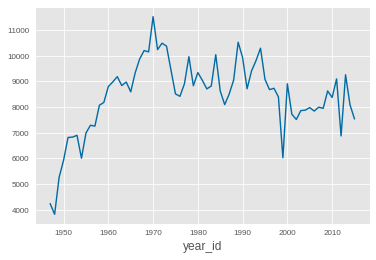

In [ ]:
# Show line plot for the sum of knicks points in each year
# plt.style.use("seaborn")
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

# nba["fran_id"].value_counts().plot(kind="hist")
# nba["fran_id"].value_counts().head(10).plot(kind="bar", title="Top 10 most played teams", ylabel='Frequency', xlabel='teams',figsize= (10,6))

You can also use matplotlib.pyplot directly:

Text(0, 0.5, 'Frequency')

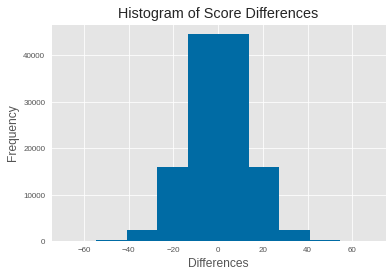

In [ ]:
# create figure and axis. This utility wrapper makes it convenient to create common layouts of subplots
fig, ax = plt.subplots()
# plot histogram
ax.hist(df['differences'])

# boxplot
# ax.boxplot(df['differences'])

# set title and labels
ax.set_title('Histogram of Score Differences')
ax.set_xlabel('Differences')
ax.set_ylabel('Frequency')